# Lecture 11: Phase Diagrams
---

In [1]:
%matplotlib inline
import sys
sys.path.append("/pithy/code")
from pithy import *

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Let's start with our gibbs energy framework for one species:

$$ dG = Vdp - SdT $$


And examine how it might change with T and P
$$ G(T_1,p_1) = G(T_0,p_0) + \int_{p_0}^{p_1} V(T_0,p)dp - \int_{T_0}^{T_1} S(T,p)dT$$

It is helpful to understand how V changes with T, so we will introduce 

$$\beta = -\frac{1}{V}\frac{\partial V}{\partial p}|_T $$ 

where
$$ d\ln(V) = -\beta dp $$

So, we now have a function of V(T,p):
$$ V(T_0,p) = V_0 \exp \left(\int_{p_0}^{p_1} \beta(T_0) dp \right) $$

Always:

$$dS = \frac{dq}{T} $$

so at constant pressure
$$dq = C_p dT$$

$$S(T,p) = \int_{T_0}^T \frac{C_p}{T} dT $$

So how does free energy _really_ change with temperature and pressure?

Well, per Gordon/Scherer we get a surface in space over T, and P:


<img src="http://steingart.princeton.edu/sharetron/Screen-Shot-2017-10-23-at-1.31.06-PM.png">

 


If we just do the calculus, we can say that,
$$dG = \frac{\partial G}{\partial p}|_T dp + \frac{\partial G}{\partial T}|_p dT $$

So we get by comparison:

$$V = \frac{\partial G}{\partial p}|_T$$

$$-S = \frac{\partial G}{\partial T}|_p$$

What this allows us to compare, now, is the curvature of the 2nd derivative:

$$\frac{\partial^2 G}{\partial p^2}|_T = \frac{\partial V}{\partial p}|_T = -\beta V$$

$$\frac{\partial^2 G}{\partial T^2}|_p = \frac{\partial S}{\partial T}|_p = -\frac{C_p}{T}$$



## Single Component Phase Diagram Exploration

So, you've seen something like this before?  How do we relate the above to get it?

<img src="http://steingart.princeton.edu/sharetron/Screen-Shot-2017-10-23-at-1.34.02-PM.png">

So, for a single component system:

$$ f = c-p+2 = 3-p $$
$$dG^\alpha = dG^\beta$$


$$ dG^\alpha = V^\alpha dp - S^\alpha dT = dG^\beta = V^\beta dp - S^\beta dT $$


$$\frac{dT}{dp} =\frac{T\Delta V}{\Delta H} $$


$$ dG^\alpha = dH^\alpha - TdS^\alpha = dG^\beta = dH^\beta  - TdS^\beta $$


$$\frac{dT}{dp} = \frac{V^\alpha-V^\beta}{S^\alpha-S^\beta}=\frac{\Delta V}{\Delta S} $$


$$S = -\frac{\partial G}{\partial T}|_p$$

$$V = \frac{\partial G}{\partial p}|_T$$




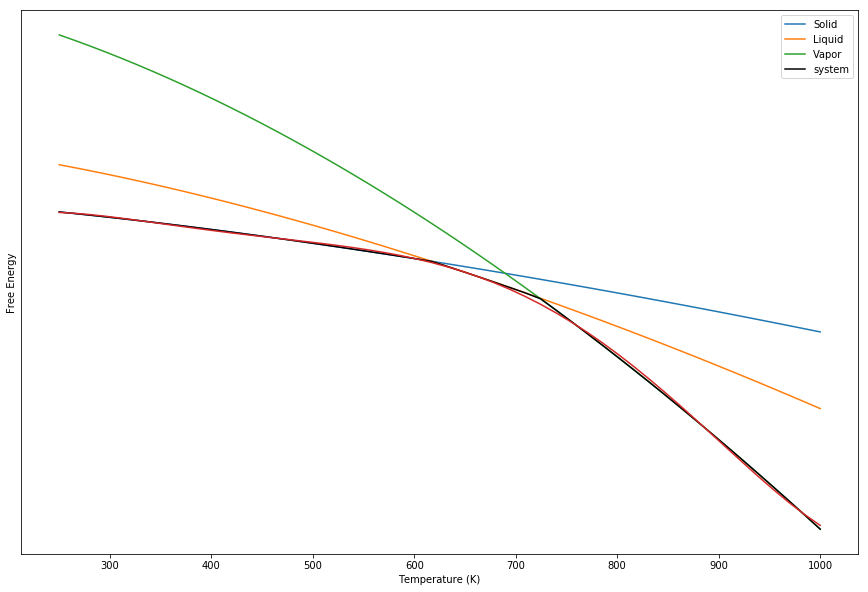

In [59]:
Ts = linspace(250,1000)

figure(figsize=(15,10))
Gs = 1200-Ts**1.5
Gl = 15000-Ts**1.6
Gv = 50000-Ts**1.7

Gcomp = []
for i in range(len(Ts)):
    arr = [Gs[i],Gl[i],Gv[i]]
    Gcomp.append(min(arr))

#Good enough for what I'm trying to do
z = polyfit(Ts,Gcomp,5)
G1 = poly1d(z)




    
plot(Ts,Gs,label="Solid")
plot(Ts,Gl,label="Liquid")
plot(Ts,Gv,label="Vapor")
plot(Ts,Gcomp,'k',label = "system")
plot(Ts,G1(Ts))


legend()
yticks([])
ylabel("Free Energy")
xlabel("Temperature (K)")
Gs = 1200-Ts**1.5
Gl = 15000-Ts**1.6
Gv = 50000-Ts**1.7

Gcomp = []
for i in range(len(Ts)):
    arr = [Gs[i],Gl[i],Gv[i]]
    Gcomp.append(min(arr))
show()

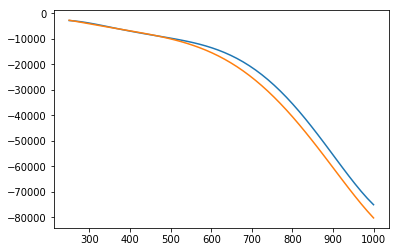

In [63]:
Gs = 1400-Ts**1.5-300
Gl = 15000-Ts**1.6-3000
Gv = 50000-Ts**1.7-5000

Gcomp = []
for i in range(len(Ts)):
    arr = [Gs[i],Gl[i],Gv[i]]
    Gcomp.append(min(arr))

z = polyfit(Ts,Gcomp,5)  
G2 = poly1d(z)


plot(Ts,G1(Ts))
plot(Ts,G2(Ts))

## Degree of Transformation 

(from Scherer)
>The degree of a phase transformation is defined as the lowest order of derivative of the free energy with respect to temperature that exhibits a discontinuity at the phase transition. For all equilibrium phase transformations, the free energy change is zero:


$$\Delta G (T_E,p) = 0 $$

For a first order phase transfomration,
$$\Delta\left(\frac{\partial G}{\partial T}|_{T_E,p}\right) \neq 0 $$

For a second order phase transfomration:
$$\Delta\left(\frac{\partial G}{\partial T}|_{T_E,p}\right) = 0 $$
but
$$\Delta\left(\frac{\partial^2 G}{\partial T^2}|_{T_E,p}\right) \neq 0 $$
always
$$S = -\frac{\partial G}{\partial T}|_p$$

$$\frac{\partial^2 G}{\partial T^2}|_p = \frac{\partial S}{\partial T}|_p = -\frac{C_p}{T}$$

For a first order

$$ \Delta S \neq  0$$
$$ \Delta H \neq  0$$


For a second order:

$$ \Delta S = \Delta H = 0$$


**Why does this matter?  What it means is that for some phase transformation at the point of transformation there is no disruptive change in entropy** It is therefore a second order phase transformation.

Are there any second order changes here?

<img src="http://steingart.princeton.edu/sharetron/Screen-Shot-2017-10-23-at-1.51.52-PM.png">


Per Scherer:

>A profound distinction between first- and second-order phase changes is that both phases are present during a first-order transition (as when water and ice are present in equilibrium at the melting point). In contrast, during a second-order transition, the properties of one phase transform continuously into those of the new phase, so only one material is present at any given time.



## Super Critical drying example

## Two Component Phase Diagrams

For N components

$$G^S = \sum_{i=1}^N x_i \mu_i = \sum_{i=1}^N x_i \mu_i^0 + RT \sum_{i=1}^N x_i \ln (a_i)$$

For N = 2:

$$G^S = G^M + RT [x_a \ln a_A + x_B \ln a_B]$$

where

$$G^M = x_AG_a + x_BG_B$$

If N = 2 and solution is ideal

$$G^{S,id} = (1-x_B)G_A + x_bG_B+ RT [(1-x_b) \ln (1-x_b) + x_B \ln a_B]$$


3000.0 3000.0


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply


([], <a list of 0 Text yticklabel objects>)

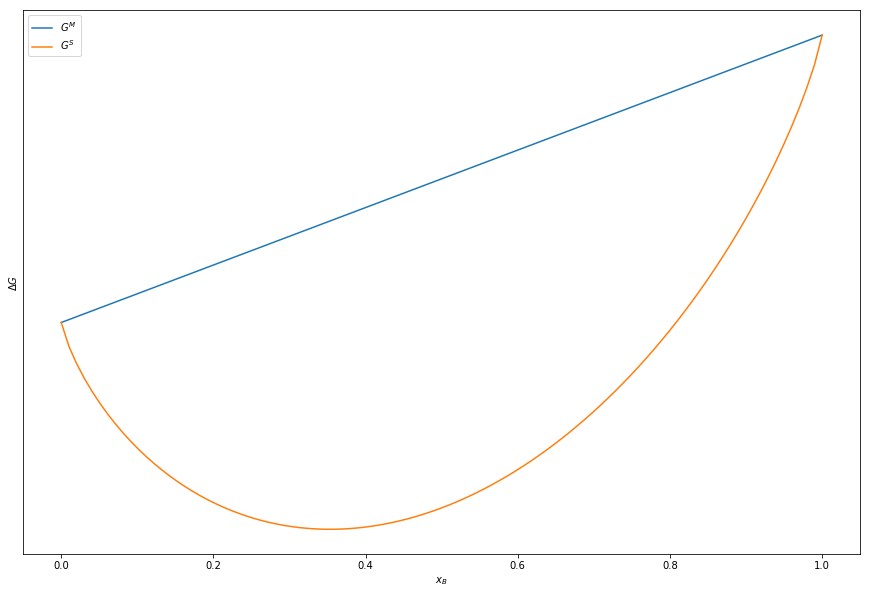

In [51]:
figure(figsize=(15,10))
R = 8.3145
T = 298.
x_A = linspace(0,1,100)
x_B = 1-x_A

G_A = 1500 #arb
G_B = 3000 #arb

G_M = x_A*G_A+x_B*G_B
G_S = G_M+nan_to_num(R*T*(x_B*log(x_B)+x_A*log(x_A))) #x ln x returns Nan rather than at 0 * inf. this fixes that

print G_S[0],G_M[0]

plot(x_B,G_M,label="$G^M$")
plot(x_B,G_S,label="$G^S$")
legend()
xlabel("$x_B$")
ylabel("$\Delta G$")
yticks([])



$$\frac{\partial G^{S,id}}{\partial x_B} = G_B-G_A - RT\ln(1-x_B)+RT\ln(x_B)$$

$$S = -\frac{\partial G}{\partial T}|_{p,n_i}$$


From this we can generate competing free energies for two species:

(From Scherer)

<img src="http://steingart.princeton.edu/sharetron/Screen-Shot-2017-10-23-at-2.05.16-PM.png">

 

Lever Rule


$$X^1 = \frac{X^b n_S + X^C n_L}{n_S+n_L}$$

$$\frac{n_S}{n_S+n_L} = \frac{X^1-X^C}{X^B-X^C}$$
$$\frac{n_L}{n_S+n_L} = \frac{X^B-X^q}{X^B-X^C}$$
